# **Classification**
Memprediksi apakah pada hari esok akan turun hujan pada daerah di Australia 

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## **Import Dataset**

In [2]:
df = pd.read_csv('/content/weatherAUS.csv', usecols=['Date', 'Location','Rainfall', 'RainToday', 'RainTomorrow'])
df.head()

,Date,Location,Rainfall,RainToday,RainTomorrow
0,2008-12-01,Albury,0.6,No,No
1,2008-12-02,Albury,0.0,No,No
2,2008-12-03,Albury,0.0,No,No
3,2008-12-04,Albury,0.0,No,No
4,2008-12-05,Albury,1.0,No,No


## **Data Analysis Data Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145460 non-null  object 
 1   Location      145460 non-null  object 
 2   Rainfall      142199 non-null  float64
 3   RainToday     142199 non-null  object 
 4   RainTomorrow  142193 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.5+ MB


In [4]:
df.isnull().sum()

Date               0
Location           0
Rainfall        3261
RainToday       3261
RainTomorrow    3267
dtype: int64

In [5]:
df.describe()

,Rainfall
count,142199.000000
mean,2.360918
std,8.478060
min,0.000000
25%,0.000000
50%,0.000000
75%,0.800000
max,371.000000


In [6]:
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [7]:
df.isnull().sum()

Date            0
Location        0
Rainfall        0
RainToday       0
RainTomorrow    0
dtype: int64

## **Visualisasi Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


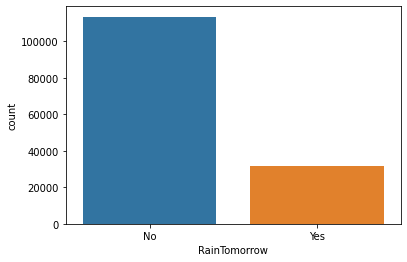

In [8]:
sns.countplot(df['RainTomorrow'], label='Count')

## **Mengencoder nilai kategorical menjadi numerik**

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Date'] = le.fit_transform(df['Date'])
df['Location'] = le.fit_transform(df['Location'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])


In [10]:
df.head(190)

,Date,Location,Rainfall,RainToday,RainTomorrow
0,396,2,0.6,0,0
1,397,2,0.0,0,0
2,398,2,0.0,0,0
3,399,2,0.0,0,0
4,400,2,1.0,0,0
...,...,...,...,...,...
185,581,2,8.0,1,0
186,582,2,0.0,0,0
187,583,2,0.2,0,1
188,584,2,14.4,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145460 non-null  int64  
 1   Location      145460 non-null  int64  
 2   Rainfall      145460 non-null  float64
 3   RainToday     145460 non-null  int64  
 4   RainTomorrow  145460 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 5.5 MB


## **Data Training & Data Testing**

In [12]:
x = df.drop(['RainTomorrow'], axis=1)
y= df['RainTomorrow']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

## **Model Machine Learning**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
# rf = RandomForestClassifier()
# rf.fit(x_train,y_train)
# xgb = XGBClassifier()
# xgb.fit(x_train,y_train)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
# tr = DecisionTreeClassifier()
# tr.fit(x_train,y_train)
# lr = LogisticRegression()
# lr.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
from sklearn.metrics import accuracy_score
x_train_pred = knn.predict(x_train)
train_pred = accuracy_score(x_train_pred, y_train)

print('Accuracy Training Data: ',train_pred)

Accuracy Training Data:  0.834567922452908


## **Evaluasi Model**

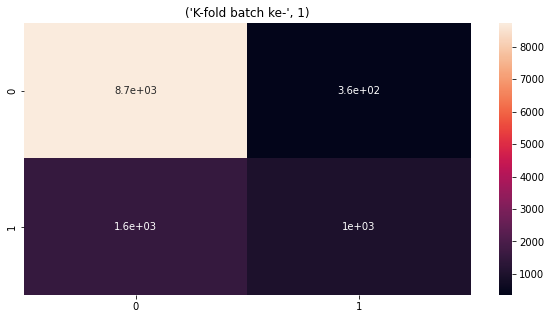

K-fold batch ke- 1
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      9087
           1       0.74      0.39      0.51      2550

    accuracy                           0.84     11637
   macro avg       0.79      0.68      0.71     11637
weighted avg       0.82      0.84      0.82     11637



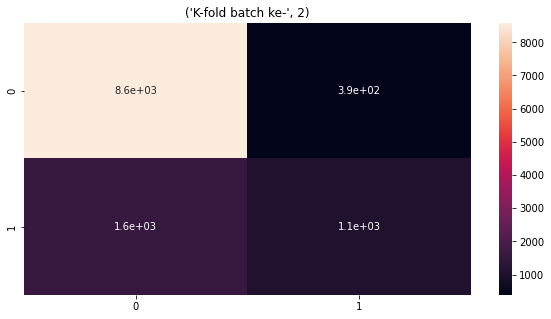

K-fold batch ke- 2
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      8971
           1       0.74      0.41      0.53      2666

    accuracy                           0.83     11637
   macro avg       0.79      0.68      0.71     11637
weighted avg       0.82      0.83      0.81     11637



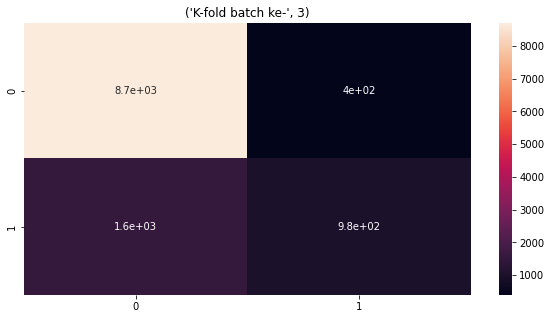

K-fold batch ke- 3
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      9094
           1       0.71      0.39      0.50      2543

    accuracy                           0.83     11637
   macro avg       0.78      0.67      0.70     11637
weighted avg       0.82      0.83      0.81     11637



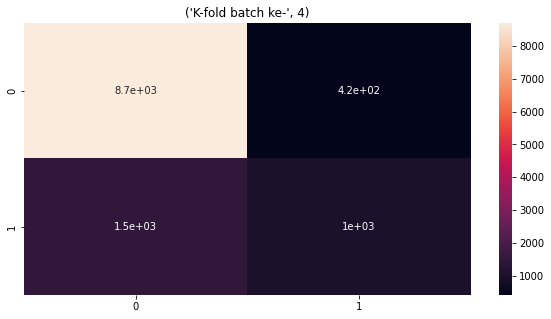

K-fold batch ke- 4
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      9120
           1       0.71      0.40      0.51      2517

    accuracy                           0.83     11637
   macro avg       0.78      0.68      0.71     11637
weighted avg       0.82      0.83      0.82     11637



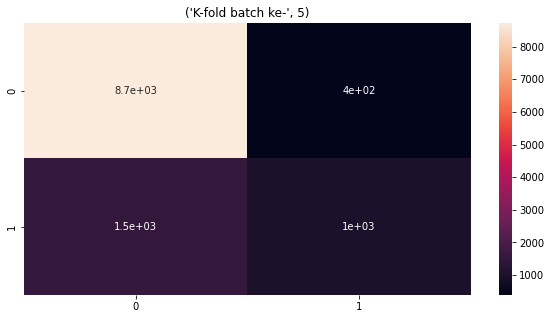

K-fold batch ke- 5
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      9118
           1       0.72      0.40      0.51      2519

    accuracy                           0.84     11637
   macro avg       0.78      0.68      0.71     11637
weighted avg       0.82      0.84      0.82     11637



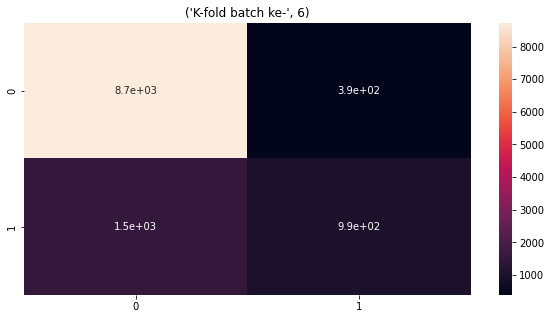

K-fold batch ke- 6
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      9114
           1       0.72      0.39      0.51      2523

    accuracy                           0.83     11637
   macro avg       0.78      0.67      0.70     11637
weighted avg       0.82      0.83      0.82     11637



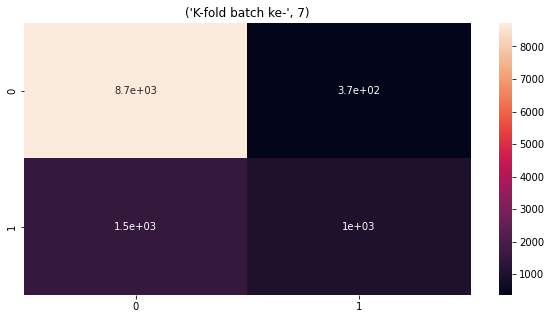

K-fold batch ke- 7
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      9091
           1       0.73      0.40      0.51      2546

    accuracy                           0.84     11637
   macro avg       0.79      0.68      0.71     11637
weighted avg       0.82      0.84      0.82     11637



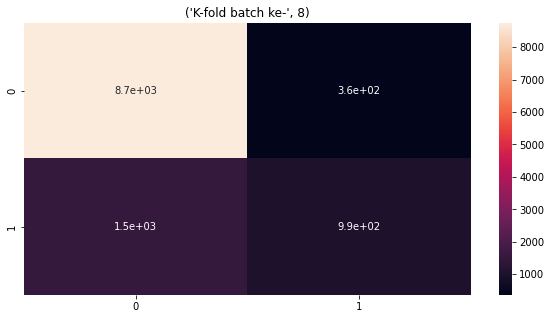

K-fold batch ke- 8
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      9111
           1       0.73      0.39      0.51      2526

    accuracy                           0.84     11637
   macro avg       0.79      0.68      0.71     11637
weighted avg       0.82      0.84      0.82     11637



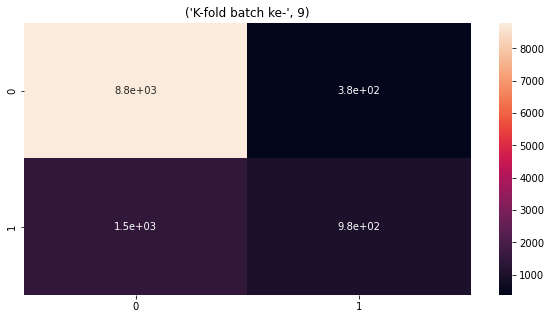

K-fold batch ke- 9
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      9165
           1       0.72      0.39      0.51      2471

    accuracy                           0.84     11636
   macro avg       0.79      0.68      0.71     11636
weighted avg       0.83      0.84      0.82     11636



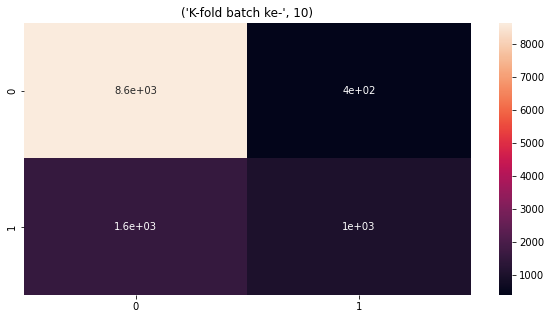

K-fold batch ke- 10
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      9040
           1       0.72      0.39      0.51      2596

    accuracy                           0.83     11636
   macro avg       0.78      0.67      0.70     11636
weighted avg       0.82      0.83      0.81     11636

Accuracy Testing Data:  0.777808332187543


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import KFold


kf = KFold(n_splits=10, shuffle=False)
txt_kf_batch = 1
for train_index, test_index in kf.split(x_train):
  X_train_fold, X_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
  y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

  y_pred_fold = knn.predict(X_test_fold)
  cr_fold = classification_report(y_test_fold, y_pred_fold)
  cm_fold = confusion_matrix(y_test_fold, y_pred_fold)

  plt.figure(figsize=(10, 5))
  ax = sns.heatmap(cm_fold, annot=True)
  plt.title(("K-fold batch ke-", txt_kf_batch))
  plt.show()
  print("K-fold batch ke-", txt_kf_batch)
  print(cr_fold)
  txt_kf_batch += 1

x_test_pred = knn.predict(x_test)
test_pred = accuracy_score(x_test_pred, y_test)

print('Accuracy Testing Data: ',test_pred)

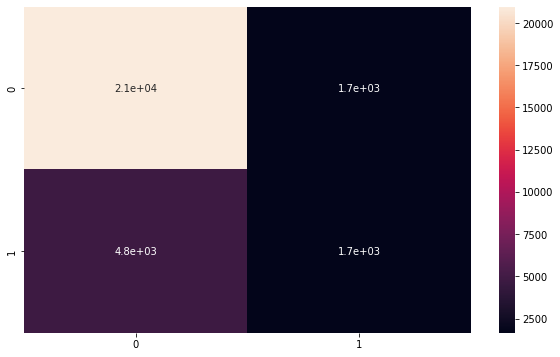

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     22672
           1       0.49      0.26      0.34      6420

    accuracy                           0.78     29092
   macro avg       0.65      0.59      0.60     29092
weighted avg       0.74      0.78      0.75     29092



In [37]:
# 1)	Evaluasi dengan data testing
y_pred = knn.predict(x_test)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 2)	Hitung dengan matrik pengukuran
plt.figure(figsize=(10,6))
ax = sns.heatmap(cm, annot=True)
plt.show()
print(cr)

Text(33.0, 0.5, 'y_true')

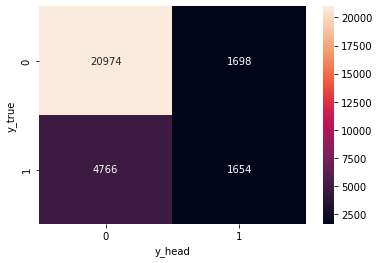

In [17]:
# f, ax = plt.subplots(figsize=(6,4))
# sns.heatmap(confusion_matrix(y_test,x_test_pred), annot=True, fmt=".0f", ax=ax)
# plt.xlabel("y_head")
# plt.ylabel("y_true")

In [18]:
df.head(800)

,Date,Location,Rainfall,RainToday,RainTomorrow
0,396,2,0.6,0,0
1,397,2,0.0,0,0
2,398,2,0.0,0,0
3,399,2,0.0,0,0
4,400,2,1.0,0,0
...,...,...,...,...,...
795,1191,2,2.6,1,1
796,1192,2,99.2,1,1
797,1193,2,51.0,1,0
798,1194,2,0.0,0,0


## **Mencoba Model Machine Learning**

In [38]:
input_data = (1192,2,99.2,1)
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
prediksi = knn.predict(input_data_reshaped)
print(prediksi)

if(prediksi[0]==0):
  print("Perkiraan hari esok tidak hujan")
else:
  print("Perkiraan hari esok akan hujan")


[1]
Perkiraan hari esok akan hujan


## **Menyimpan Model Machine Learning**

In [20]:
from joblib import dump, load
pickle = '/content./Australian1_Weather.joblib'